<a href="https://colab.research.google.com/github/dbtrago/IA_2025-1/blob/main/PEC1_ValeriaManjarrez_DanielBuitrago_AlejandroAlzate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrantes**


*   Valeria Manjarrez Garzon
*   Daniel Esteban Buitrago Lozano
*   Alejandro Antonio Alzate Rodriguez



# **Librerias**

En esta sección se definen todos los imports que tendremos en el documento.

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate3

In [20]:
!wget -O dataset_diabetes.zip 'https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip'
!unzip dataset_diabetes.zip

--2025-03-15 23:16:48--  https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset_diabetes.zip’

dataset_diabetes.zi     [   <=>              ]   3.02M  6.20MB/s    in 0.5s    

2025-03-15 23:16:49 (6.20 MB/s) - ‘dataset_diabetes.zip’ saved [3170254]

Archive:  dataset_diabetes.zip
replace diabetic_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetic_data.csv       
replace IDS_mapping.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IDS_mapping.csv         


# **Informacion basica del data set**

In [21]:
df = pd.read_csv('diabetic_data.csv')
df.info # se obtiene la meta informacion del data set
df.shape # Se obtiene las dimensiones del data set
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# **PEC - PUNTO 1 : DESCRIPCION DEL DATA SET**

El dataset "Diabetes 130-US hospitals for years 1999-2008" proviene del repositorio de la Universidad de California en Irvine (UCI) y contiene información clínica sobre 101.766 registros de pacientes con diabetes hospitalizados en 130 hospitales de EE.UU. entre 1999 y 2008. Su finalidad es proporcionar datos para el análisis de readmisión hospitalaria, identificación de patrones en el tratamiento de la diabetes y estudios relacionados con el cuidado de la salud.

El dataset cuenta con 50 variables, de las cuales 13 son numéricas (como la edad y el tiempo de hospitalización) y 37 son categóricas (como el género, la raza, los diagnósticos y los medicamentos administrados).

Cantidad de Variables categoricas y númericas

In [ ]:
num_vars = df.select_dtypes(include=['int64', 'float64']).shape[1]

# Contar las variables categóricas (object y category)
cat_vars = df.select_dtypes(include=['object', 'category']).shape[1]

print(f"Cantidad de variables numéricas: {num_vars}")
print(f"Cantidad de variables categóricas: {cat_vars}")

Cantidad de variables numéricas: 13
Cantidad de variables categóricas: 37


**La variable Label es remitted.**

In [40]:
#Bad lines permite eliminar filas con datos faltantes
df = pd.read_csv("diabetic_data.csv", on_bad_lines="skip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#**PEC - PUNTO 2 : DICCIONARIO DE DATOS**#

In [41]:
# Cargar el dataset
df = pd.read_csv("diabetic_data.csv")

pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 200)  # Ajusta el ancho de la tabla en la pantalla
pd.set_option('display.colheader_justify', 'center')  # Alinea los títulos de las columnas
pd.set_option('display.float_format', '{:.2f}'.format)  # Formato de decimales

# Crear un diccionario con la información clave de cada columna
data_dict = {
    "Nombre de la Variable": df.columns,
    "Rol (Predictor/Label)": ["Predictor" if col != "readmitted" else "Label" for col in df.columns],
    'Tipo Categórica o Numérica': ['Numérica' if df[col].dtype in ['int64', 'float64'] else 'Categórica' for col in df.columns],
    "Datos Vacíos": ["S" if df[col].isnull().any() else "N" for col in df.columns],
    "Valor Mínimo": [df[col].min() if df[col].dtype in ['int64', 'float64'] else "N/A" for col in df.columns],
    "Valor Máximo": [df[col].max() if df[col].dtype in ['int64', 'float64'] else "N/A" for col in df.columns],
    "Media": [df[col].mean() if df[col].dtype in ['int64', 'float64'] else "N/A" for col in df.columns],
    "Media por Clase": ["N/A" for col in df.columns],
    "Moda y Moda por clase": ["N/A" for col in df.columns],
    "Valores Categórica y Frecuencia": ["N/A" for col in df.columns]
}

# Convertir el diccionario en un DataFrame
df_data_dict = pd.DataFrame(data_dict)

# Mostrar la tabla utilizando tabulate
print(tabulate(df_data_dict, headers='keys', tablefmt='pretty', showindex=False, numalign="center", stralign="center"))

+--------------------------+-----------------------+----------------------------+--------------+--------------+--------------+---------------------+-----------------+-----------------------+---------------------------------+
|  Nombre de la Variable   | Rol (Predictor/Label) | Tipo Categórica o Numérica | Datos Vacíos | Valor Mínimo | Valor Máximo |        Media        | Media por Clase | Moda y Moda por clase | Valores Categórica y Frecuencia |
+--------------------------+-----------------------+----------------------------+--------------+--------------+--------------+---------------------+-----------------+-----------------------+---------------------------------+
|       encounter_id       |       Predictor       |          Numérica          |      N       |    12522     |  443867222   |  165201645.6229782  |       N/A       |          N/A          |               N/A               |
|       patient_nbr        |       Predictor       |          Numérica          |      N       |    

# Matriz de Correlación de Pearson

Graficamos la matriz de correlacion

In [38]:
# Pasamos la clase a valores numéricos para ser procesados en la matriz de correlación
label_encoder = LabelEncoder()
df['readmitted'] = label_encoder.fit_transform(df['readmitted'].astype(str))

# Se crea la matriz de correlación de Pearson
corr_matrix = df.corr()

# Se calcula la transpuesta de relación de Pearson para visualizarla mejor
transposed_corr = corr_matrix[::-1]

# Se crea el mapa de calor
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(
    z=transposed_corr.values,
    x=list(transposed_corr.columns),
    y=list(transposed_corr.index),
    annotation_text=transposed_corr.round(2).values,
    colorscale='Greens',
    font_colors=['black'],
    showscale=True
)

# Se ajusta el mapa de calor para una mejor visualización
fig.update_layout(
    title='Matriz de Correlación de Pearson',
    width=1500,
    height=1500,
    margin=dict(l=20, r=20, b=50, t=10),
    font_size=8
)

# Se muestra el gráfico en pantalla
fig.show()

#  **PEC - PUNTO 3 : COLUMNAS CON MAS DEL 30% DE VALORES FALTANTES**

 Columnas con más del 30% de valores faltantes

In [46]:
# Calcular el porcentaje de valores faltantes por columna
porcentaje_faltantes = df.isnull().mean() * 100

# Crear un DataFrame con los resultados
tabla_faltantes = pd.DataFrame({
    'Variable': porcentaje_faltantes.index,
    'Porcentaje de Valores Faltantes': porcentaje_faltantes.values
})

# Filtrar las variables con más del 0% de valores faltantes
tabla_faltantes = tabla_faltantes[tabla_faltantes['Porcentaje de Valores Faltantes'] > 0]

# Ordenar de mayor a menor por el porcentaje de valores faltantes
tabla_faltantes = tabla_faltantes.sort_values(by='Porcentaje de Valores Faltantes', ascending=False)

# Mostrar la tabla
print(tabla_faltantes)

        Variable       Porcentaje de Valores Faltantes
5              weight              96.86              
22      max_glu_serum              94.75              
23          A1Cresult              83.28              
11  medical_specialty              49.08              
10         payer_code              39.56              
2                race               2.23              
20             diag_3               1.40              
19             diag_2               0.35              
18             diag_1               0.02              


In [51]:
# Calcular el porcentaje de valores faltantes por columna
porcentaje_faltantes = df.isnull().mean() * 100

# Identificar las columnas con más del 30% de valores faltantes
columnas_a_eliminar = porcentaje_faltantes[porcentaje_faltantes > 30].index.tolist()

# Filtrar el DataFrame para eliminar las columnas con más del 30% de valores faltantes
df_filtrado = df.drop(columns=columnas_a_eliminar)

# Crear una lista de las columnas que quedaron
columnas_que_quedaron = df_filtrado.columns.tolist()

# Mostrar los resultados
print("Columnas eliminadas (más del 30% de valores faltantes):")
print(columnas_a_eliminar)

print("\nColumnas que quedaron:")
print(columnas_que_quedaron)

Columnas eliminadas (más del 30% de valores faltantes):
['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']

Columnas que quedaron:
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


# **PEC - PUNTO 4 : MEJORA  EN LA CALIDAD DE DATOS**

Para mejorar la calidad del dataset, se realizará una limpieza de datos para evitar errores en los resultados

In [54]:
# Identificar las columnas que tienen al menos un valor nulo o NaN
columnas_con_nulos = df_filtrado.columns[df_filtrado.isnull().any()].tolist() # Changed df to df_filtrado

# Mostrar la lista de columnas con al menos un valor nulo
print("Columnas con al menos un valor nulo o NaN:")
print(columnas_con_nulos)

Columnas con al menos un valor nulo o NaN:
['race', 'diag_1', 'diag_2', 'diag_3']


**1.Limpieza de datos:**
Se eliminan las columnas que tengas mas del 30% de los valores nulos para evitar que haya poca informacion en el analisis. También se eliminan las columnas que no contribuyan al modelo  

In [ ]:
#cargar el dataset
df = pd.read_csv('diabetic_data.csv')

#1. eliminar columnas faltantes y nulas
thresh = 0.7 * len(df) #30% de valores nulos como maximo
df = df.dropna(thresh=thresh, axis=1)

**2. Manejo de valores nulos:**
Para las variables numericas los valores nulos se reemplazaran por la media de la columna, y para las variables categoricas los valores nulos se reemplazaran por la moda de la columna.

In [ ]:
#2. Reemplazo de valores nulos
for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:
    df[col].fillna(df[col].mean(), inplace=True)
  elif df[col].dtype == 'object':
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-17-2b0102632917>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-17-2b0102632917>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-17-2b0102632917>:6: FutureWarning: A value is trying to be set on a copy of a 

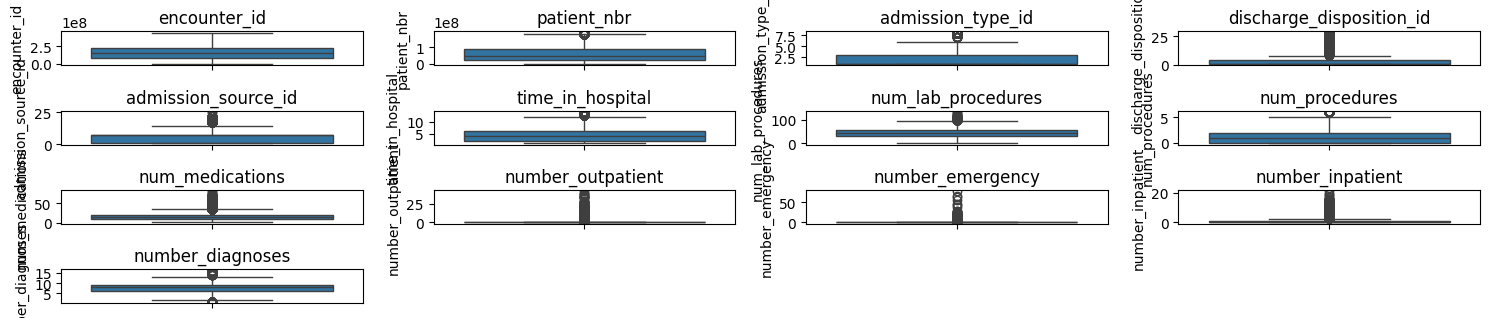

In [ ]:
# 3. Detección de valores atípicos con boxplot
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot( 10, 4, i)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# **PEC - PUNTO 5 : GRAFICOS**

Se comienza con toda la actitud

Cargar el dataset a excel

In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
#import pandas as pd

# Carga el dataset desde un archivo CSV
#df = pd.read_csv('diabetic_data.csv')

# Crea un objeto ExcelWriter para escribir el DataFrame a un archivo Excel
#with pd.ExcelWriter('diabetic_data_formatted.xlsx', engine='xlsxwriter') as writer:
    # Escribe el DataFrame a la hoja de Excel
   # df.to_excel(writer, sheet_name='Data', index=False)

    # Obtén el workbook y la hoja de trabajo para aplicar formato
    #workbook  = writer.book
    #worksheet = writer.sheets['Data']

    # Ajusta el ancho de las columnas basándote en el contenido
    #for i, col in enumerate(df.columns):
        # Ajusta el ancho de la columna basándose en la longitud máxima del contenido de la columna
       # max_len = max(df[col].astype(str).map(len).max(), len(col)) + 2  # Suma 2 para espacio extra
        #worksheet.set_column(i, i, max_len)


In [ ]:
df.to_excel('diabetic_data_clean.xlsx', index=False)

In [ ]:
from google.colab import files
files.download("diabetic_data_clean.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>